In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('C:/Users/MIDAS/Desktop/weatherAUS (1).csv')

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
df.isnull().mean() * 100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [32]:
#We need to fill NA's 

In [33]:
cat_null = ['WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']

In [36]:
dep_var = 'RainTomorrow'
object_cols = df.select_dtypes(include = ['object']).columns
float_cols = df.select_dtypes(include = ['float']).columns
float_cols, object_cols

(Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
        'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
       dtype='object'),
 Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object'))

In [39]:
float_cols = df.select_dtypes(include = ['float']).columns
for col in float_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_null:
    df[col] = df[col].fillna(df[col].mode()[0])
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [42]:
for col in cat_null+['Location']:
    df[col] = pd.Categorical(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           8425 non-null   object  
 1   Location       8425 non-null   category
 2   MinTemp        8425 non-null   float64 
 3   MaxTemp        8425 non-null   float64 
 4   Rainfall       8425 non-null   float64 
 5   Evaporation    8425 non-null   float64 
 6   Sunshine       8425 non-null   float64 
 7   WindGustDir    8425 non-null   category
 8   WindGustSpeed  8425 non-null   float64 
 9   WindDir9am     8425 non-null   category
 10  WindDir3pm     8425 non-null   category
 11  WindSpeed9am   8425 non-null   float64 
 12  WindSpeed3pm   8425 non-null   float64 
 13  Humidity9am    8425 non-null   float64 
 14  Humidity3pm    8425 non-null   float64 
 15  Pressure9am    8425 non-null   float64 
 16  Pressure3pm    8425 non-null   float64 
 17  Cloud9am       8425 non-null   fl

In [43]:
cols = cat_null + ['Location']
df[cols] = df[cols].apply(lambda x: x.cat.codes)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

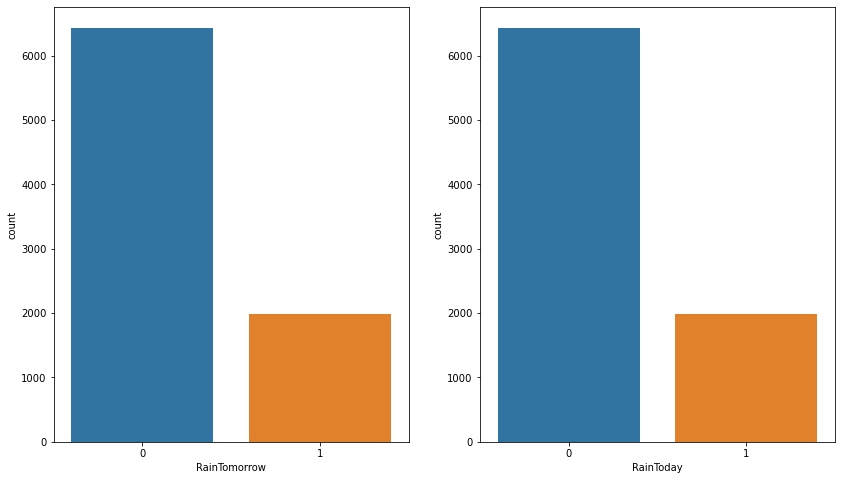

In [44]:
# Rain Today and Rain Tomorrow Visual
fig,ax = plt.subplots(1,2, figsize = (14,8))

sns.countplot(data = df,x='RainTomorrow',ax=ax[0])
sns.countplot(data = df,x='RainToday',ax=ax[1])

In [11]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [12]:
df.shape

(8425, 23)

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8185.000000,8186.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.243128,0.243220
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,0.428998,0.429053
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,0.000000,0.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,0.000000,0.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,0.000000,0.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

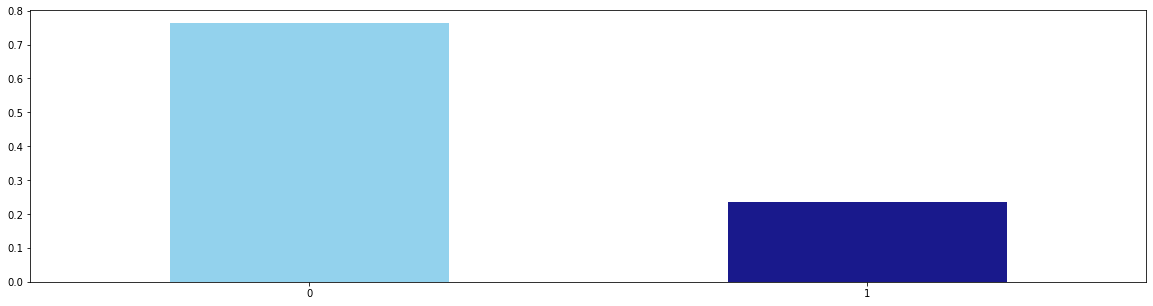

In [56]:
fig = plt.figure(figsize = (20,5))
ax=df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.show()

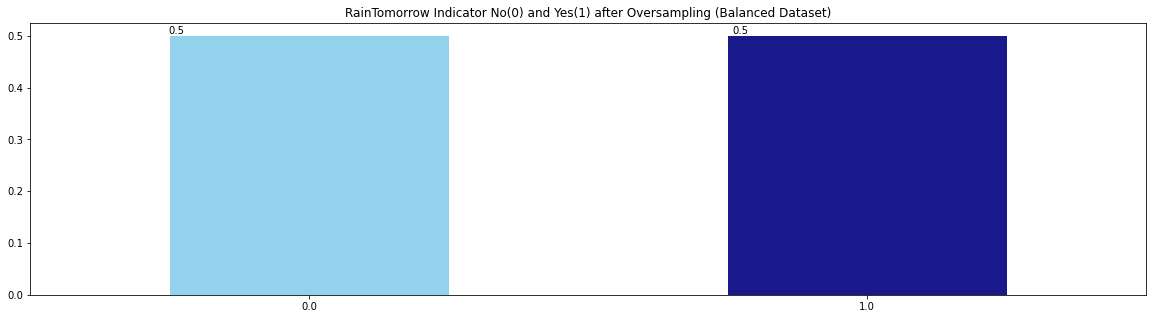

In [17]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [57]:
oversampled.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [59]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [60]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1438.750000
Location            5.000000
MinTemp             8.200000
MaxTemp             8.500000
Rainfall            3.200000
Evaporation         4.200000
Sunshine            6.385302
WindGustDir         9.000000
WindGustSpeed      20.000000
WindDir9am          9.000000
WindDir3pm          7.000000
WindSpeed9am       13.000000
WindSpeed3pm       15.000000
Humidity9am        24.000000
Humidity3pm        28.000000
Pressure9am         8.000000
Pressure3pm         8.000000
Cloud9am            4.029635
Cloud3pm            4.000000
Temp9am             8.000000
Temp3pm             8.200000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [50]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(9739, 23)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()

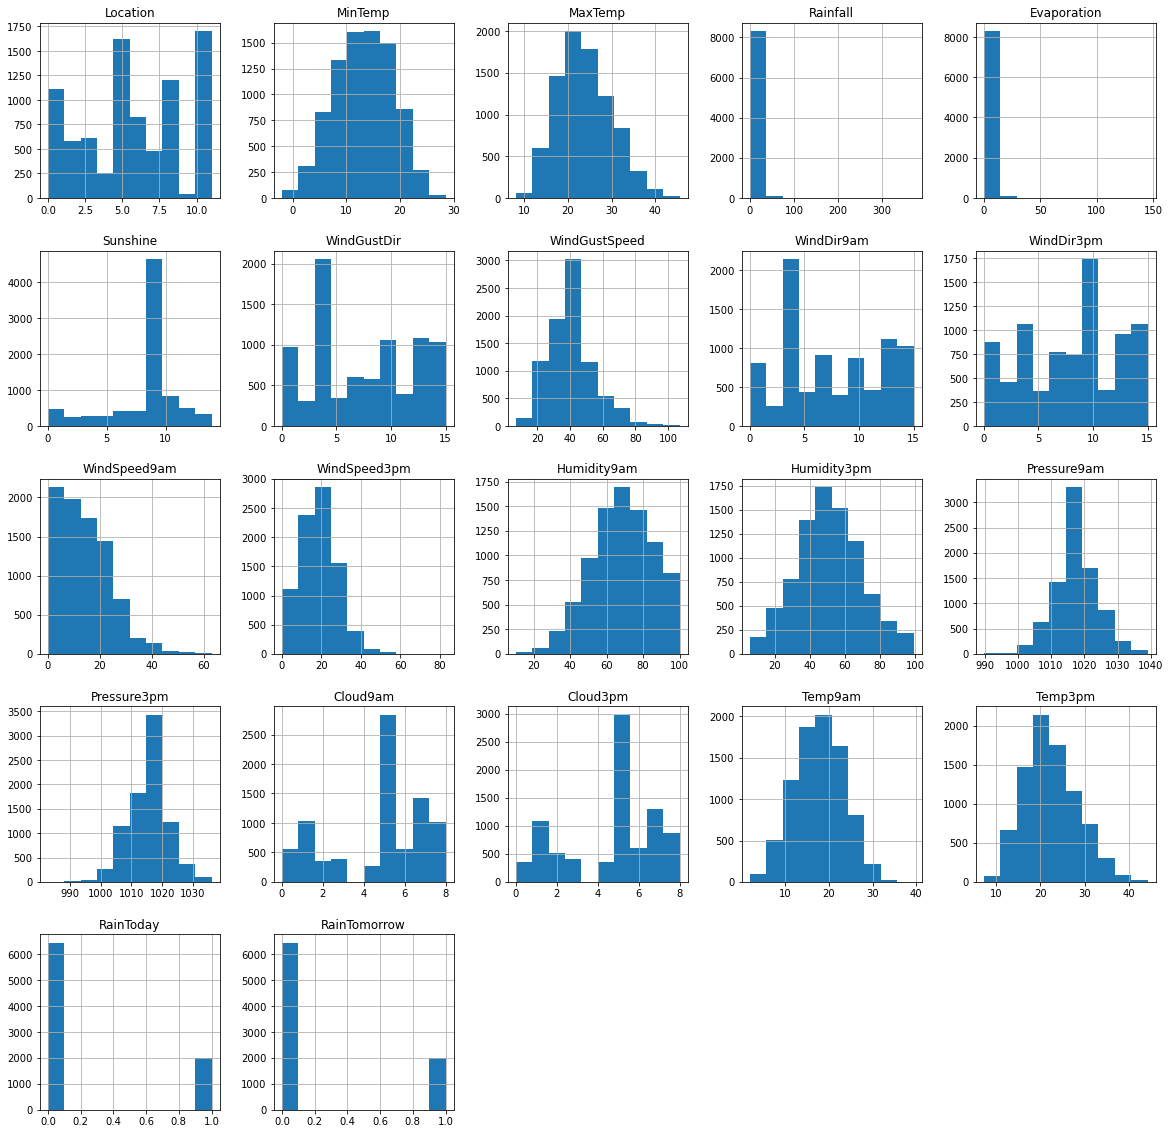

In [52]:
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

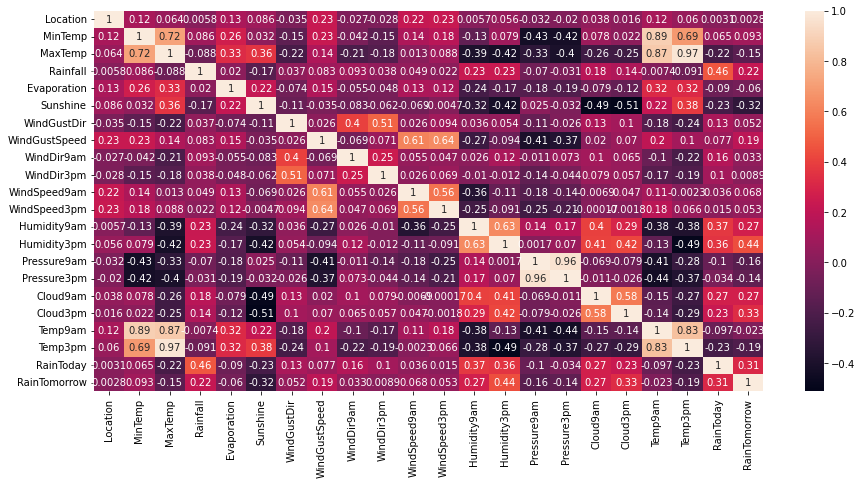

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

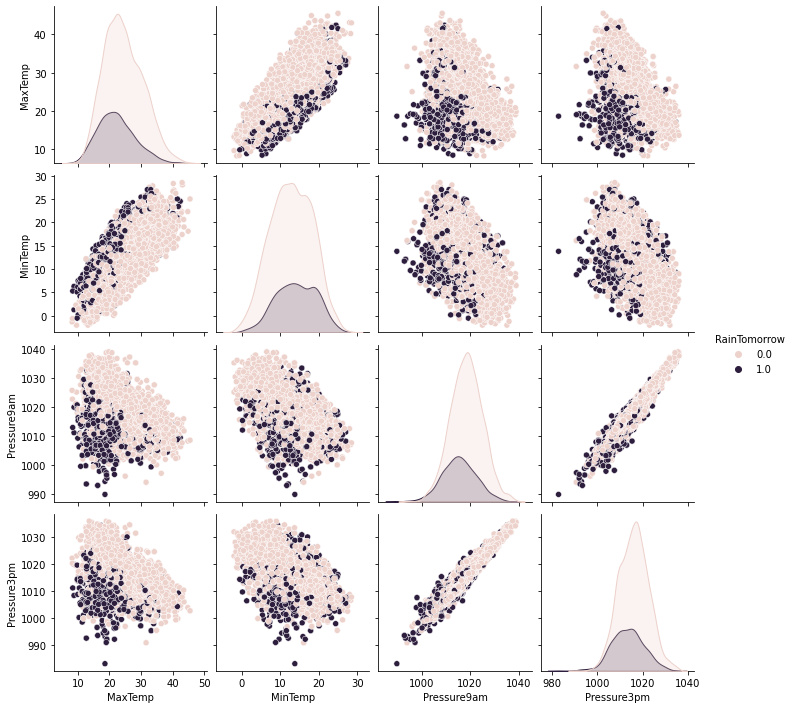

In [30]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow' )
plt.show()

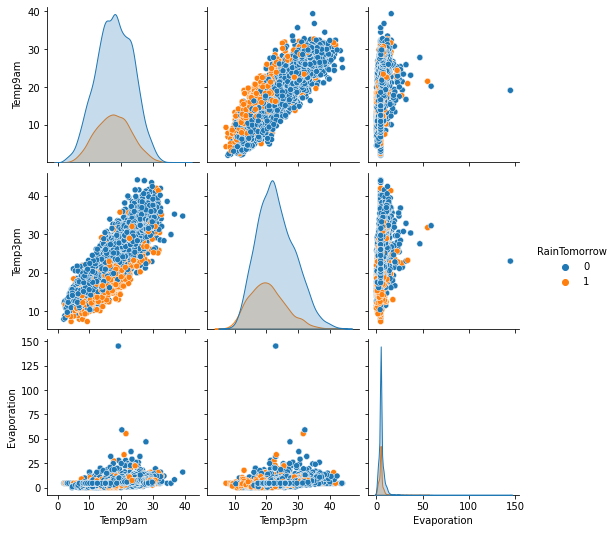

In [63]:
sns.pairplot( data=df, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

In [64]:
def get_month(date):
    return int(date.split('-')[1])
df = df.rename(columns={'Date': 'Month'})
df['Month'] = df['Month'].apply(get_month)

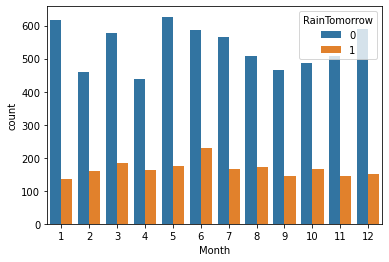

In [65]:
sns.countplot(data = df, x='Month', hue = df['RainTomorrow'])
plt.show()


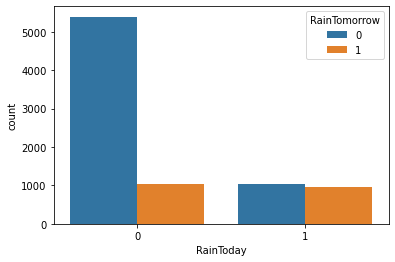

In [66]:
sns.countplot(data = df, x = 'RainToday', hue=df['RainTomorrow']);

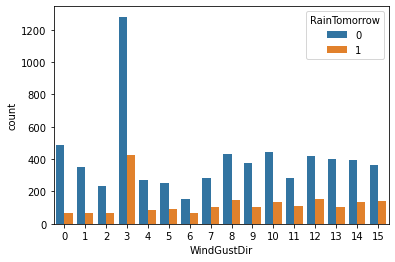

In [67]:
sns.countplot(data = df, x = 'WindGustDir', hue=df['RainTomorrow']);

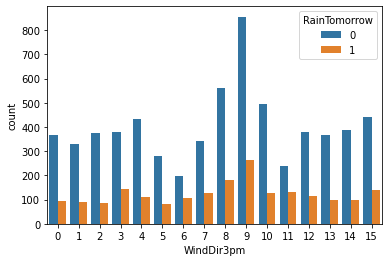

In [68]:
sns.countplot(data = df, x = 'WindDir3pm', hue=df['RainTomorrow']);

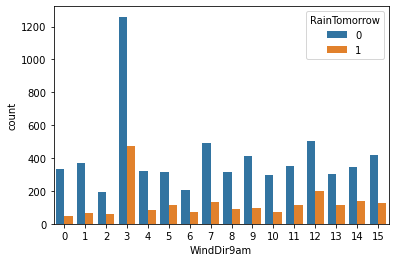

In [69]:
sns.countplot(data = df, x = 'WindDir9am', hue=df['RainTomorrow']);

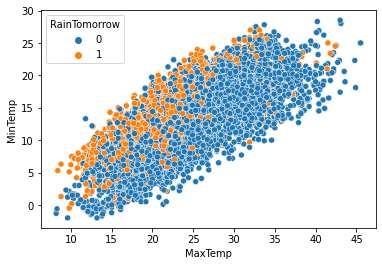

In [70]:
sns.scatterplot(x='MaxTemp', y='MinTemp', data=df, hue='RainTomorrow');

In [71]:
cor = df.corr()
feature = cor.index[abs(cor['RainTomorrow'])>0.3].tolist()
df_FE = df[feature]
df_FE.head()

,Sunshine,Humidity3pm,Cloud3pm,RainToday,RainTomorrow
0,8.7,22.0,5.0,0,0
1,8.7,25.0,5.0,0,0
2,8.7,30.0,2.0,0,0
3,8.7,16.0,5.0,0,0
4,8.7,33.0,8.0,0,0


In [72]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(df), index=df.index, columns=df.columns)

In [93]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp3pm']
[0.02674282 0.0219553  0.04750215 0.04659056 0.04808117 0.02812544
 0.05021504 0.0276239  0.05474968 0.02779471 0.03063394 0.03430361
 0.03530107 0.05829144 0.15940389 0.04597729 0.04843523 0.02856013
 0.05667387 0.04342764 0.049378   0.0302331 ]


In [75]:
features = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = df['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [76]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [78]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.829080118694362
ROC Area under Curve = 0.7067456552381175
Cohen's Kappa = 0.4660693027257664
Time taken = 0.12346267700195312
              precision    recall  f1-score   support

           0    0.85251   0.93862   0.89349      1287
           1    0.70522   0.47487   0.56757       398

    accuracy                        0.82908      1685
   macro avg    0.77886   0.70675   0.73053      1685
weighted avg    0.81772   0.82908   0.81651      1685



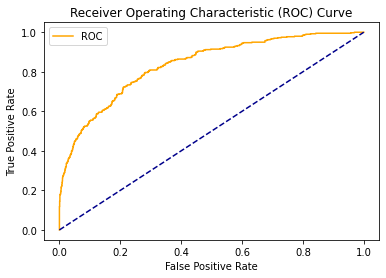

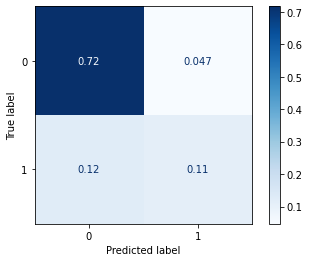

In [79]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8011869436201781
ROC Area under Curve = 0.7284040638311995
Cohen's Kappa = 0.45326809065400553
Time taken = 0.024959802627563477
              precision    recall  f1-score   support

           0    0.87246   0.86636   0.86940      1287
           1    0.57740   0.59045   0.58385       398

    accuracy                        0.80119      1685
   macro avg    0.72493   0.72840   0.72662      1685
weighted avg    0.80276   0.80119   0.80195      1685



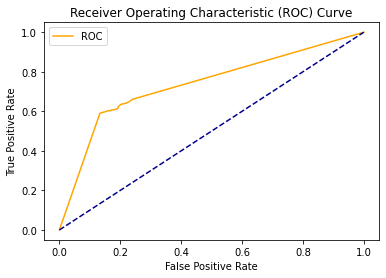

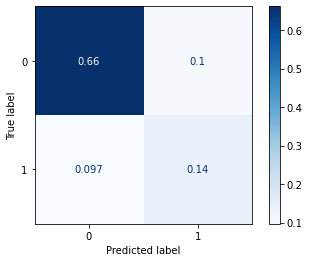

In [80]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8178041543026706
ROC Area under Curve = 0.757505476098441
Cohen's Kappa = 0.504933012664382
Time taken = 21.195367574691772
              precision    recall  f1-score   support

           0    0.88766   0.87179   0.87966      1287
           1    0.60808   0.64322   0.62515       398

    accuracy                        0.81780      1685
   macro avg    0.74787   0.75751   0.75240      1685
weighted avg    0.82162   0.81780   0.81954      1685



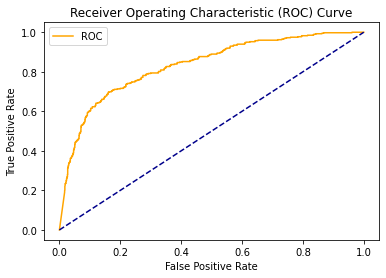

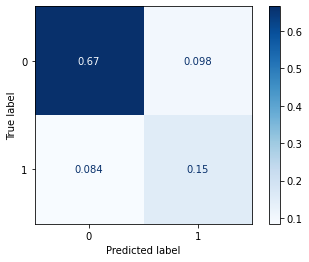

In [82]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.8795252225519288
ROC Area under Curve = 0.7840250202059247
Cohen's Kappa = 0.6298086028604051
Time taken = 2.3320472240448
              precision    recall  f1-score   support

           0    0.88714   0.96503   0.92445      1287
           1    0.84211   0.60302   0.70278       398

    accuracy                        0.87953      1685
   macro avg    0.86462   0.78403   0.81362      1685
weighted avg    0.87650   0.87953   0.87209      1685



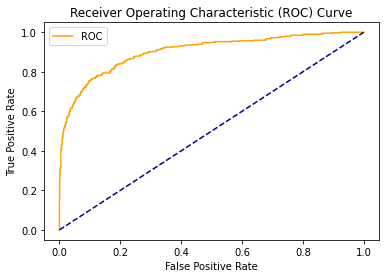

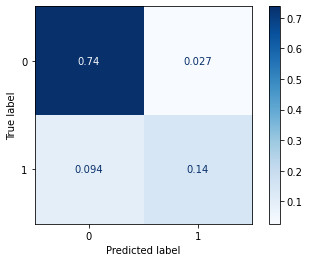

In [83]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8807121661721068
ROC Area under Curve = 0.803025422372156
Cohen's Kappa = 0.6470395131076385
Time taken = 173.61778283119202
              precision    recall  f1-score   support

           0    0.89926   0.95027   0.92406      1287
           1    0.80308   0.65578   0.72199       398

    accuracy                        0.88071      1685
   macro avg    0.85117   0.80303   0.82303      1685
weighted avg    0.87654   0.88071   0.87633      1685



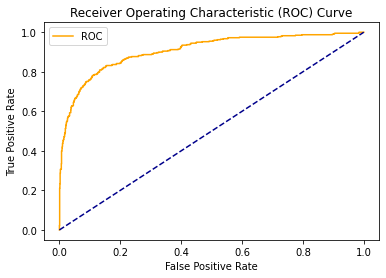

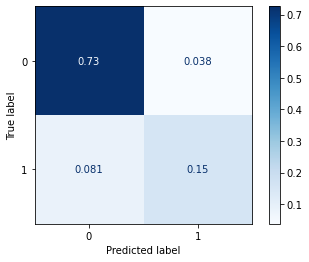

In [86]:
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

In [ ]:
#HOW MUCH RAINFALL WILL BE THERE???


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

A = df.drop('Rainfall', axis=1)
b = df['Rainfall']lr=
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [ ]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size=0.2, random_state=42)
print('Size of A_train : ', A_train.shape)
print('Size of b_train : ', b_train.shape)
print('Size of A_test : ', A_test.shape)
print('Size of b_test : ', b_test.shape)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [110]:
linear_reg = LinearRegression()
linear_reg.fit(A_train, b_train)

LinearRegression()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [ ]:
logistic_regression_model = LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(A_train)
A_train_scaled = pd.DataFrame(scaler.transform(A_train),
                              columns = A_train.columns)
A_train_scaled.head()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, A, b):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, A, b, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, A, b, cv=cv, scoring='r2').mean())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, A_train_scaled, b_train)

In [ ]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation